In [16]:
import torch
import random
import matplotlib.pyplot as plt

# Membuat Fungsi untuk generate data sintesis

In [17]:
def data_sintetis(w, b, jumlah_data):
    X = torch.normal(0, 1, (jumlah_data, len(w)))   # generate data acak sebanyak jumlah_data
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.1, y.shape)
    return X, y.reshape((-1, 1))

# Generate data sintesis dengan mendefinisikan target weight dan bias

In [18]:
# w dan b asli hanya digunakan untuk generate data sintesis
w_asli = torch.tensor([2, -3.4])
b_asli = 4.2

# generate data sintesis sejumlah 1000 data berdasarkan w dan b asli
# dalam hal ini $y = 2x1 - 3.4x2 + 4.2$
X, y = data_sintetis(w_asli, b_asli, 1000)
print(X, y)
print(X.shape, y.shape)

tensor([[-2.6855,  0.9163],
        [ 1.8845, -0.1347],
        [ 0.3339, -0.9017],
        ...,
        [-1.7943,  0.3721],
        [ 0.7669, -0.3530],
        [ 1.1462,  0.3755]]) tensor([[-4.1648e+00],
        [ 8.5018e+00],
        [ 7.9098e+00],
        [ 4.3236e+00],
        [ 4.6911e+00],
        [ 4.2024e+00],
        [ 2.3052e+00],
        [ 1.9948e+00],
        [ 4.8831e+00],
        [-3.1753e+00],
        [ 8.0478e+00],
        [ 2.4679e-02],
        [ 1.5640e+00],
        [-3.9778e+00],
        [-1.3564e-01],
        [-7.2672e-01],
        [-2.7135e-01],
        [ 5.9586e+00],
        [-3.2551e+00],
        [ 8.1093e+00],
        [ 1.0967e+01],
        [-1.3734e+00],
        [ 9.5569e+00],
        [ 3.7835e+00],
        [ 1.2366e+01],
        [ 8.2071e+00],
        [ 1.5818e+00],
        [-4.2985e-01],
        [ 5.0351e+00],
        [ 8.0132e+00],
        [-7.9249e+00],
        [ 8.1381e+00],
        [ 6.9382e-01],
        [ 6.9105e+00],
        [ 9.0396e+00],
        [ 2.3

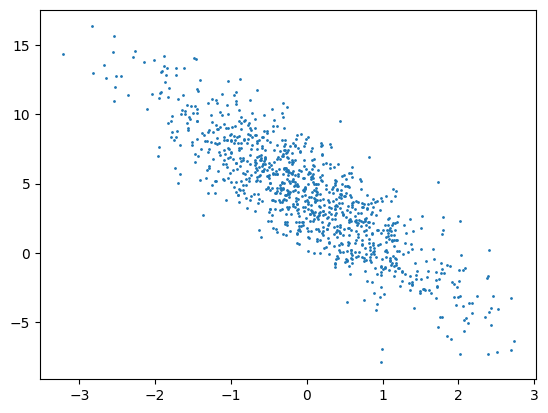

In [19]:
# scatter plot data sintesis
plt.scatter(X[:, (1)].detach().numpy(), y.detach().numpy(), 1)

# Membaca Dataset

In [20]:
def memuat_data(batch_size, X, y):
    # Menghitung panjang data masukan
    banyaknya_data = len(X)

    # Memberikan indeks dari data yang akan dijadikan mini-batch
    indices = list(range(banyaknya_data))

    # Mengecek urutan data
    random.shuffle(indices)

    for i in range(0, banyaknya_data, batch_size):
        batch_indices = torch.tensor(indices[i: min(i + batch_size, banyaknya_data)])
        yield X[batch_indices], y[batch_indices]
    
batch_size = 10
for X, y in memuat_data(batch_size, X, y):
    print(X, '\n', y)

tensor([[ 1.2669, -1.4485],
        [-0.5297, -1.8308],
        [-1.1352, -1.2922],
        [ 0.2054,  1.1278],
        [ 0.2747, -0.4665],
        [ 1.3361,  0.7872],
        [-0.8379, -0.4505],
        [ 0.4701,  0.5244],
        [-0.8339, -0.3726],
        [ 0.3655, -0.2696]]) 
 tensor([[11.8068],
        [ 9.3718],
        [ 6.1645],
        [ 0.8218],
        [ 6.3148],
        [ 4.2150],
        [ 3.8505],
        [ 3.1170],
        [ 3.7965],
        [ 5.8850]])
tensor([[ 2.0454, -0.0835],
        [-0.0264,  2.4260],
        [-0.3572, -0.3441],
        [-0.8923,  0.6830],
        [ 0.8138,  0.7883],
        [ 1.3661, -1.1884],
        [ 1.1416, -0.8999],
        [ 0.0460,  0.8596],
        [-0.3903, -0.7828],
        [-0.1434,  0.3137]]) 
 tensor([[ 8.5798],
        [-4.0163],
        [ 4.5460],
        [ 0.0879],
        [ 3.2465],
        [10.8572],
        [ 9.5494],
        [ 1.3725],
        [ 5.9513],
        [ 2.8048]])
tensor([[ 1.7528, -1.1241],
        [-0.3018,  0.057

Yield adalah salah satu cara kita untuk mengembalikan sebuah value dan menghentikan sementara eksekusi function yang sedang berjalan. Biasanya ekspresi yield digunakan dalam fungsi yang bersifat sebagai generator

In [21]:
def simpleGeneratorFun():
    yield 1
    yield 2
    yield 3

# fungsi generator dipanggil berkali-kali untuk generate data hingga eksperi yield yang paling akhir pada fungsi generator

for value in simpleGeneratorFun():
    print("Hasil dari yield adalah: ", value)


def simpleGenerator():
    yield 9
    return 8


for value in simpleGenerator():
    print("Hasil dari return adalah: ", value) # hanya mengembalikan nilai pada ekspresi yield, nilai yang di return tidak akan ditampilkan

Hasil dari yield adalah:  1
Hasil dari yield adalah:  2
Hasil dari yield adalah:  3
Hasil dari return adalah:  9


Inisiialisasi Weight, Bias, Model, Loss Function dan Optimizer

In [22]:
# inisiasi weight dan bias
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)


# menentukan model linear regression
def linreg(X, w, b):
    return torch.matmul(X, w) + b # model regresi linear $y = Xw + b$, X adalah data dan y adalah output regresi


# menentukan loss function
def squared_loss(y_hat, y):
    return (y_hat - y.view(y_hat.shape)) ** 2 / 2 # mean squared error loss


# menentukan optimizer
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size # update weight dan bias menggunakan stochastic gradient descent
            param.grad.zero_()

# Training

In [23]:
# menentukan learning rate dan epoch
lr = 0.01
epoch = 100

for epoch in range(epoch):
    for X, y in memuat_data(batch_size, X, y):
        # menghitung prediksi
        nilai_loss = squared_loss(linreg(X, w, b), y)
        # menghitung gradien
        nilai_loss.sum().backward()
        # mengupdate nilai weight dan bias
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        # menampilkan nilai loss
        print('Epoch {}, nilai loss: {:.2f}, nilai w: {:.2f}, nilai b: {:.2f}'
              .format(epoch + 1, nilai_loss.sum().item(), w[0].item(), b.item()))

Epoch 1, nilai loss: 120.02, nilai w: 0.03, nilai b: 0.04
Epoch 2, nilai loss: 118.04, nilai w: 0.03, nilai b: 0.08
Epoch 3, nilai loss: 116.08, nilai w: 0.04, nilai b: 0.12
Epoch 4, nilai loss: 114.17, nilai w: 0.04, nilai b: 0.16
Epoch 5, nilai loss: 112.29, nilai w: 0.04, nilai b: 0.20
Epoch 6, nilai loss: 110.44, nilai w: 0.05, nilai b: 0.24
Epoch 7, nilai loss: 108.63, nilai w: 0.05, nilai b: 0.28
Epoch 8, nilai loss: 106.85, nilai w: 0.06, nilai b: 0.32
Epoch 9, nilai loss: 105.10, nilai w: 0.06, nilai b: 0.35
Epoch 10, nilai loss: 103.39, nilai w: 0.07, nilai b: 0.39
Epoch 11, nilai loss: 101.70, nilai w: 0.07, nilai b: 0.43
Epoch 12, nilai loss: 100.05, nilai w: 0.08, nilai b: 0.46
Epoch 13, nilai loss: 98.42, nilai w: 0.08, nilai b: 0.50
Epoch 14, nilai loss: 96.83, nilai w: 0.09, nilai b: 0.54
Epoch 15, nilai loss: 95.26, nilai w: 0.09, nilai b: 0.57
Epoch 16, nilai loss: 93.72, nilai w: 0.10, nilai b: 0.61
Epoch 17, nilai loss: 92.21, nilai w: 0.10, nilai b: 0.64
Epoch 18, n

Karena kita mengetahui nilai weight dan bias yang sesungguhnya, kita dapat mengkalkulasi prediksi yang benar dengan menggunakan model yang sudah kita buat.

In [24]:
# Menghitung error terhadap nilai weight dan bias yang sesungguhnya
print("Error dalam menghitung w: ", (w_asli - w.reshape(w_asli.shape)).data.numpy())
print("Error dalam menghitung b: ", (b - b_asli).norm().item())

Error dalam menghitung w:  [ 1.4599513 -2.0613499]
Error dalam menghitung b:  1.6010944843292236
